In [1]:
import pandas as  pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-03-20 16:32:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 64:ff9b::a93f:7668, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|64:ff9b::a93f:7668|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70% 36.7K 1s
    50K .......... ..........                                 100% 87.2K=1.6s

2023-03-20 16:32:18 (44.3 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [3]:
df= pd.read_csv("FuelConsumption.csv")

In [5]:
df.shape

(1067, 13)

In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [7]:
df= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [8]:
df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [9]:
df.shape

(1067, 4)

In [10]:
df.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

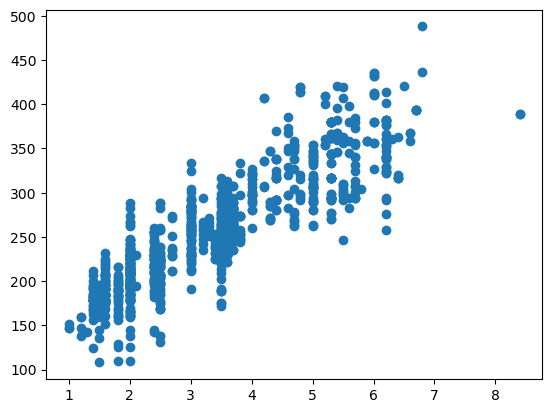

In [17]:
plt.scatter(x=df['ENGINESIZE'],y=df['CO2EMISSIONS'])

In [18]:
import seaborn as sns

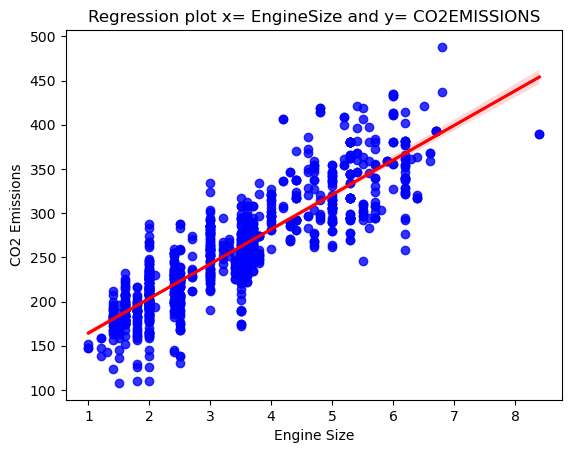

In [25]:
sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})

plt.title('Regression plot x= EngineSize and y= CO2EMISSIONS')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

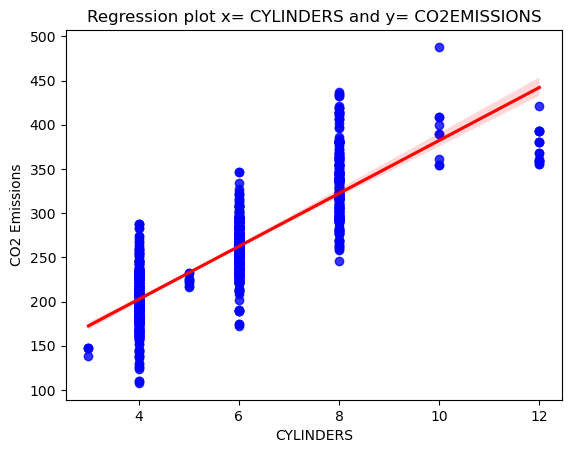

In [27]:
sns.regplot(x=df['CYLINDERS'], y=df['CO2EMISSIONS'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})

plt.title('Regression plot x= CYLINDERS and y= CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 Emissions')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
X= df[['ENGINESIZE', 'CYLINDERS']]
y= df['CO2EMISSIONS']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=40)

In [45]:
X_train.shape

(853, 2)

In [46]:
y_train.shape

(853,)

In [47]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred= lr.predict(X_test)

In [57]:
y_pred.shape

(214,)

In [92]:
type(y_pred)

pandas.core.frame.DataFrame

In [49]:
lr.coef_


array([30.03503843,  7.76817675])

In [50]:
lr.intercept_

109.97480353367376

In [59]:
from sklearn.metrics import mean_squared_error,r2_score

In [58]:
mse=mean_squared_error(y_test,y_pred)

In [55]:
mse

847.0450045155767

In [60]:
r2_score(y_test,y_pred)

0.7196835044553399

In [90]:
X_test.shape

(214, 2)

In [91]:
y_pred.shape

(214, 1)

In [72]:
lr_line

,ENGINESIZE,CYLINDERS
350,272.164011,172.120218
559,260.149996,172.120218
554,260.149996,172.120218
423,215.097438,156.583864
1042,152.023857,141.047511
...,...,...
168,218.100942,156.583864
271,152.023857,141.047511
409,155.027361,141.047511
731,296.192042,172.120218


In [81]:
type(X_test)


pandas.core.frame.DataFrame

In [96]:
X_test

,ENGINESIZE,CYLINDERS
350,5.4,8
559,5.0,8
554,5.0,8
423,3.5,6
1042,1.4,4
...,...,...
168,3.6,6
271,1.4,4
409,1.5,4
731,6.2,8


In [82]:
type(y_pred)

numpy.ndarray

In [84]:
y_pred= pd.DataFrame(y_pred,columns=["Y predicted"])

In [85]:
y_pred

,Y predicted
0,334.309425
1,322.295410
2,322.295410
3,261.706499
4,183.096564
...,...
209,264.710002
210,183.096564
211,186.100068
212,358.337456


In [88]:
y_pred.isnull().sum()

Y predicted    0
dtype: int64

In [89]:
X_test.isnull().sum()

ENGINESIZE    0
CYLINDERS     0
dtype: int64